In [25]:
#Basic neural net to predict the sum of two input values

import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [26]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [35]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [39]:
loss_fn = nn.MSELoss()
mynet = MyNeuralNet().to(device)
_Y = mynet(X)
loss_value = loss_fn(_Y,Y)
print(loss_value)

tensor(123.3415, grad_fn=<MseLossBackward0>)


In [43]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

loss_history= []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_fn(mynet(X),Y) #calc loss
    loss_value.backward() #compute gradients of loss function with respect to each weight and bias
    opt.step() #update the weights based on gradients
    loss_history.append(loss_value.item())


Text(0, 0.5, 'loss value')

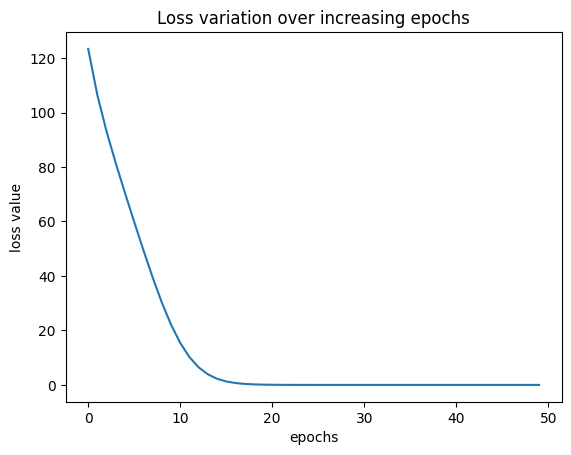

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [46]:
#TEST

val_x = [[17,11]]
val_x = torch.tensor(val_x).float().to(device)
mynet(val_x)

tensor([[27.2383]], grad_fn=<AddmmBackward0>)